In [97]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator,ClassifierMixin
from abc import ABC, abstractmethod,abstractstaticmethod
from scipy.special import expit
from sklearn.preprocessing import label_binarize

In [98]:
def define_axes(X):
  min1,max1 = X[:,0].min(),X[:,0].max()
  min2,max2 = X[:,1].min(),X[:,1].max()
  return [min1-.1,max1+.1,min2-.1,max2+.1]
  
def plotdataset(X,y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y == k],X[:,1][y==k],'o',alpha=0.3)

def plotPredictions(clf,X):
  axes = define_axes(X)
  x0s = np.linspace(axes[0],axes[1],100)
  x1s = np.linspace(axes[2],axes[3],100)
  x0,x1 = np.meshgrid(x0s,x1s)
  X = np.c_[x0.ravel(),x1.ravel()]
  ypred = clf.predict(X).reshape(x0.shape)
  plt.contourf(x0,x1,ypred,cmap=plt.cm.brg,alpha = 0.2)

In [99]:
def criaDataset(n=200, n_classes=2):
  X, y = make_blobs(n_samples=n, centers=n_classes * 2, cluster_std=0.8)
  
  y = np.array(y % n_classes, dtype= int)
  
  return X, y

In [117]:
Xm,ym = criaDataset(n_classes=2,n=1000)

In [118]:
X = Xm
y = ym

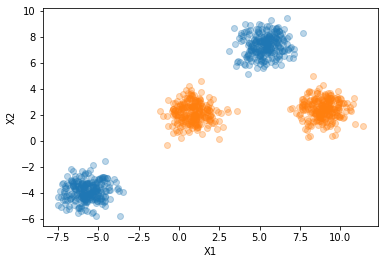

In [119]:
plotdataset(X,y)

In [105]:
class trainingalgorithm(ABC):
  @abstractmethod
  def getW(self,X,y):
    pass
    
class PseudoInversa(trainingalgorithm):
  def getW(self,X,y):
    return np.linalg.pinv(X) @ y

In [110]:
class Backpropagation():
  def __init__(self):
    self.n_hidden = 8
    self.activation = tanh
    self.learning_rate = 0.001
    self.max_iter = 10000

  def foward(self):
    Xb = self.Xb
    self.pH = Xb @ self.wih # o p significa pre ativacao
    self.H = self.activation(self.pH)
    self.Hb = includebias(self.H)
    self.py = self.Hb @ self.who

  def backward(self, y):
    ho_delta = y - self.py
    ho_grad = self.Hb.T @ ho_delta
    tanh_grad = (1 - np.square(tanh(self.pH)))
    ih_delta = (ho_delta @ self.who[1:,:].T) * tanh_grad
    #
    ih_grad = self.Xb.T @ ih_delta 
    self.who += ho_grad * self.learning_rate
    self.wih += ih_grad * self.learning_rate

  def fit(self, X, y):
    self.Xb = includebias(X)
    self.wih = np.random.uniform(-1, 1,  size=(self.Xb.shape[1], self.n_hidden))
    self.who = np.random.uniform(-1, 1, size=(self.n_hidden + 1, y.shape[1]))
    for _ in range(self.max_iter):
      self.foward()
      self.backward(y)

  def predict(self, X, g=None):
      Xb = includebias(X)
      H = self.activation(Xb @ self.wih)
      Hb = includebias(H)
      return Hb @ self.who


def includebias(X):
    bias = np.ones((X.shape[0],1))
    Xb = np.concatenate((bias,X),axis=1)
    return Xb

def tanh(a):
  return expit(a)*2-1

class FixedWeights():
  def __init__(self):
    self.n_hidden = 2
    self.activation = tanh
    self.training = PseudoInversa()
  
  def fit(self, X, y):
    self.wih = np.array([[1.75, 0.95, -0.9], [-1.75, 0.85, -0.9]]).T
    H = self.activation(includebias(X) @ self.wih)
    Hb = includebias(H)
    self.who = self.training.getW(Hb,y)

  def predict(self, X, g=None):
    Xb = includebias(X)
    H = self.activation(Xb @ self.wih)
    Hb = includebias(H)
    return Hb @ self.who


class MLP(BaseEstimator, ClassifierMixin):
  def __init__(self,training_algorithm):
    # training algorithm
    self.training_algorithm = training_algorithm
   
  def encode_labels(self, y):
    self.labels = list(set(y))
    return label_binarize(y, classes=self.labels) * 2 -1

  def fit(self, X, y):
    yhot = self.encode_labels(y)
    self.training_algorithm.fit(X, yhot)

  def predict(self, X, y=None):
    a = self.training_algorithm.predict(X)
    if len(self.labels) <=2:
      idx = np.array(a > 0, dtype=int).reshape((-1,))
    else:
      idx = np.argmax(a, axis=1)
    ypred = np.array([self.labels[i] for i in idx])
    return ypred

In [120]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=.9)

In [126]:
model = MLP(training_algorithm=Backpropagation())

model.fit(Xtr,ytr)

ypred = model.predict(Xtr,ytr)

sum(ytr == ypred)/len(ytr)

1.0

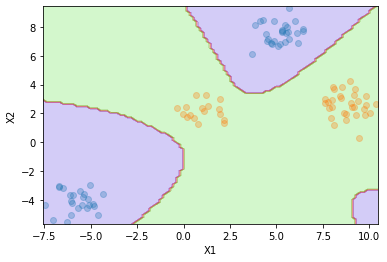

In [127]:
plotdataset(Xtr,ytr)
plotPredictions(model,Xtr)

In [128]:
ypred = model.predict(Xte,yte)
sum(yte== ypred)/len(yte)

0.9988888888888889

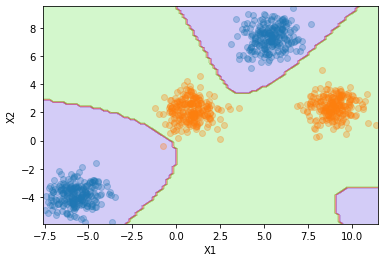

In [129]:
plotdataset(Xte,yte)
plotPredictions(model,Xte)